In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
icu_data = pd.read_csv("train1_icu_data.csv")
icu_labels = pd.read_csv("train1_icu_label.csv").values.ravel()

icu_test_new = pd.read_csv("test1_icu_data.csv")
icu_testL_new = pd.read_csv("test1_icu_label.csv").values.ravel()

In [6]:
settings = [
    {'n_estimators': 50, 'max_depth': None, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': None, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': None, 'criterion': 'gini'},
    {'n_estimators': 50, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 50, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 50, 'max_depth': None, 'criterion': 'entropy'},
    {'n_estimators': 100, 'max_depth': None, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': None, 'criterion': 'entropy'},
    {'n_estimators': 50, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 10, 'criterion': 'entropy'},
]

best_accuracy = 0
best_model = None
best_settings = None

for setting in settings:
    clf = RandomForestClassifier(**setting)
    clf.fit(icu_data, icu_labels)
    predictions = clf.predict(icu_test_new)
    accuracy = accuracy_score(icu_testL_new, predictions)
    print(f"Settings: {setting}, Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf
        best_settings = setting

print()
print(f"Best Settings: {best_settings}, Best Accuracy: {best_accuracy}")

importances = best_model.feature_importances_
features = icu_data.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(10)) 


Settings: {'n_estimators': 50, 'max_depth': None, 'criterion': 'gini'}, Accuracy: 0.796718322698268
Settings: {'n_estimators': 100, 'max_depth': None, 'criterion': 'gini'}, Accuracy: 0.7958067456700091
Settings: {'n_estimators': 200, 'max_depth': None, 'criterion': 'gini'}, Accuracy: 0.7994530537830447
Settings: {'n_estimators': 50, 'max_depth': 10, 'criterion': 'gini'}, Accuracy: 0.7912488605287147
Settings: {'n_estimators': 50, 'max_depth': 20, 'criterion': 'gini'}, Accuracy: 0.7985414767547858
Settings: {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}, Accuracy: 0.8003646308113036
Settings: {'n_estimators': 100, 'max_depth': 20, 'criterion': 'gini'}, Accuracy: 0.796718322698268
Settings: {'n_estimators': 200, 'max_depth': 10, 'criterion': 'gini'}, Accuracy: 0.7958067456700091
Settings: {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'}, Accuracy: 0.7948951686417502
Settings: {'n_estimators': 50, 'max_depth': None, 'criterion': 'entropy'}, Accuracy: 0.786690975387

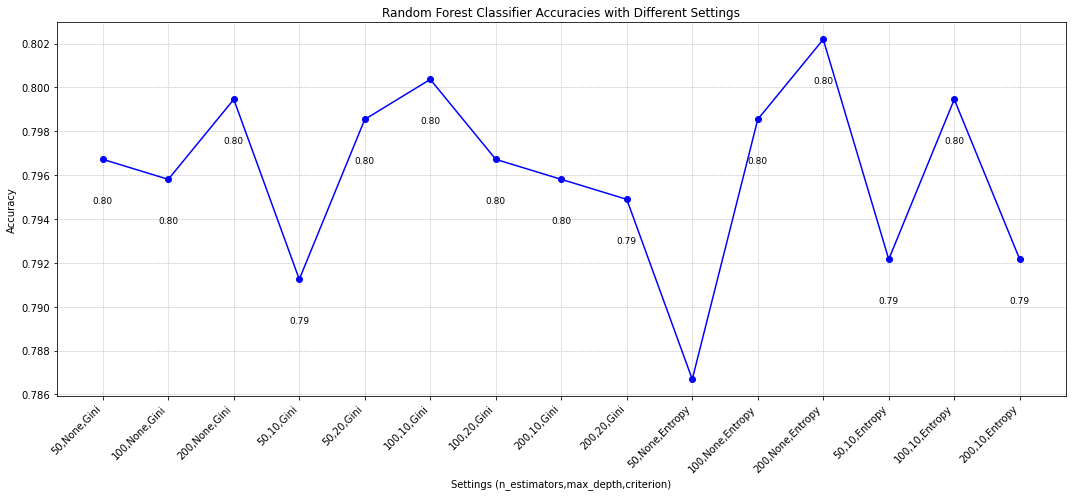

In [18]:
plt.figure(figsize=(15, 7))

plt.plot(settings, accuracies, marker='o', linestyle='-', color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Settings (n_estimators,max_depth,criterion)')
plt.title('Random Forest Classifier Accuracies with Different Settings')
plt.xticks(rotation=45, ha="right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

for i, txt in enumerate(accuracies):
    plt.annotate(f"{txt:.2f}", (settings[i], accuracies[i] - 0.002), fontsize=9, ha='center')

plt.tight_layout()
plt.show()
